In [1]:
# set path to parent file
from pathlib import Path
import os
cwd_path = Path.cwd()
set_path = str(cwd_path.parent)
os.chdir(set_path)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import importlib
import SimulatedAnealing 
importlib.reload(SimulatedAnealing)
SimulatedAnnealing = SimulatedAnealing.SimulatedAnnealing
mpl.rcParams['figure.dpi'] = 300
from rana import rana_func

# Simulated Annealing

In [3]:
random_seed = 3

# Simplest Model

In [27]:
np.random.seed(random_seed )
x_max = 500
x_min = -x_max
rana_2d = SimulatedAnnealing(x_length=2, x_bounds=(x_min, x_max), objective_function=rana_func,
                             maximum_archive_length=100,
                                   archive_minimum_acceptable_dissimilarity=60, maximum_markov_chain_length=50,
                                   temperature_maximum_iterations=200, pertubation_fraction_of_range=0.1)
x_result, objective_result = rana_2d.run()
print(f"x_result = {x_result} \n objective_result = {objective_result} \n "
      f"number of function evaluations = {rana_2d.objective_function_evaluation_count}")

archive_x = np.array([x_archive for x_archive, f_archive in rana_2d.archive])
archive_f = np.array([f_archive for x_archive, f_archive in rana_2d.archive])

x_result = [-479.7013966  500.       ] 
 objective_result = -500.79232505477995 
 number of function evaluations = 10081


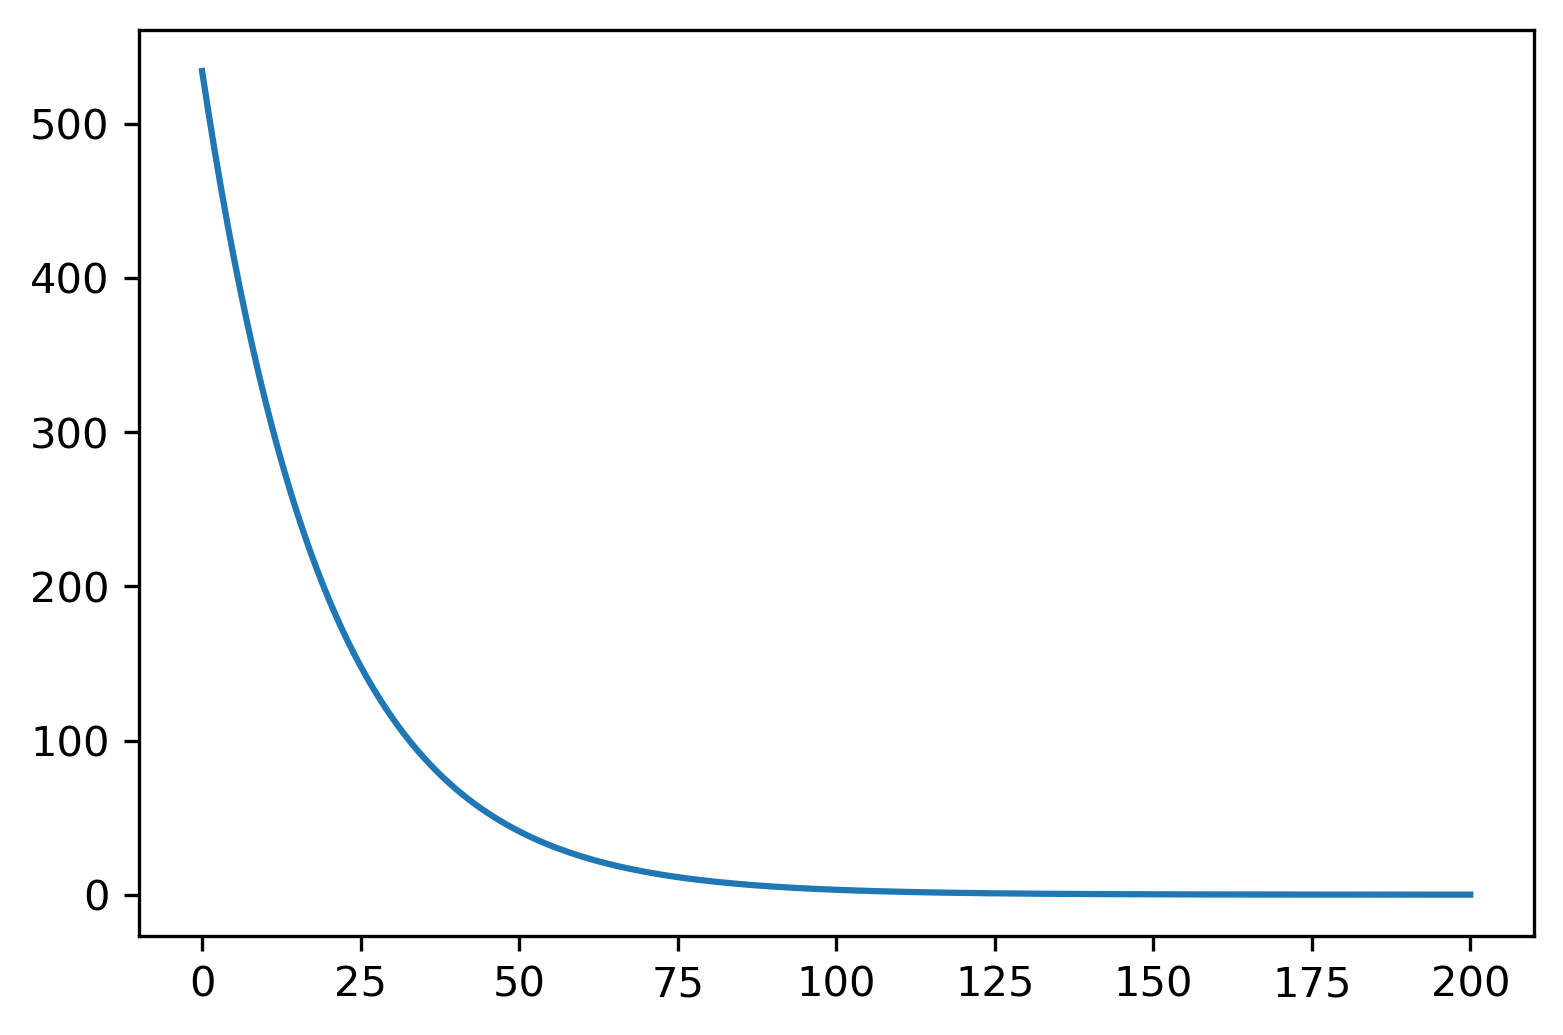

In [28]:
plt.plot(rana_2d.temperature_history)

In [30]:
n = 50
x1_linspace = np.linspace(x_min, x_max, n)
x2_linspace = np.linspace(x_min, x_max, n)
z = np.zeros((n, n))
for i, x1_val in enumerate(x1_linspace):
    for j, x2_val in enumerate(x2_linspace):
        z[i, j] = rana_func(np.array([x1_val, x2_val]))
x2, x1 = np.meshgrid(x1_linspace, x2_linspace)

In [31]:
x_result[0], x_result[1], objective_result

(-500.0, -498.9706956588335, -499.7457054287212)

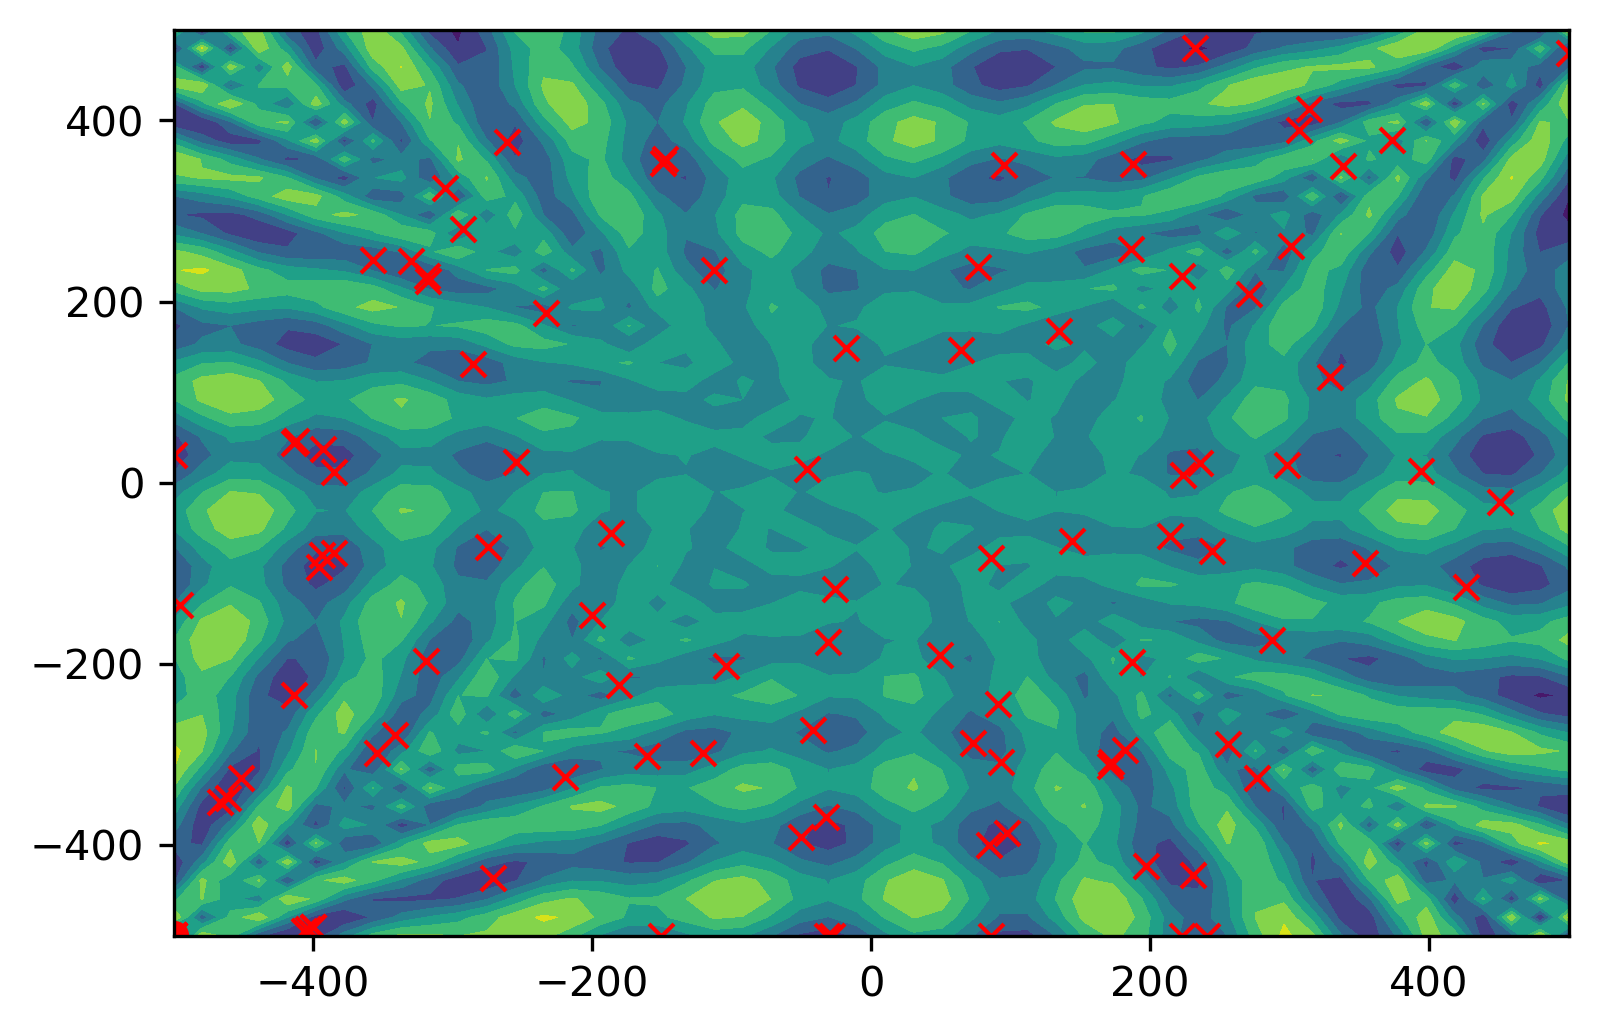

In [32]:
plt.figure(1)
plt.contourf(x1,x2,z)
plt.plot(x_result[0], x_result[1], "or")
plt.plot(archive_x[:, 0], archive_x[:, 1], "xr")
plt.show()

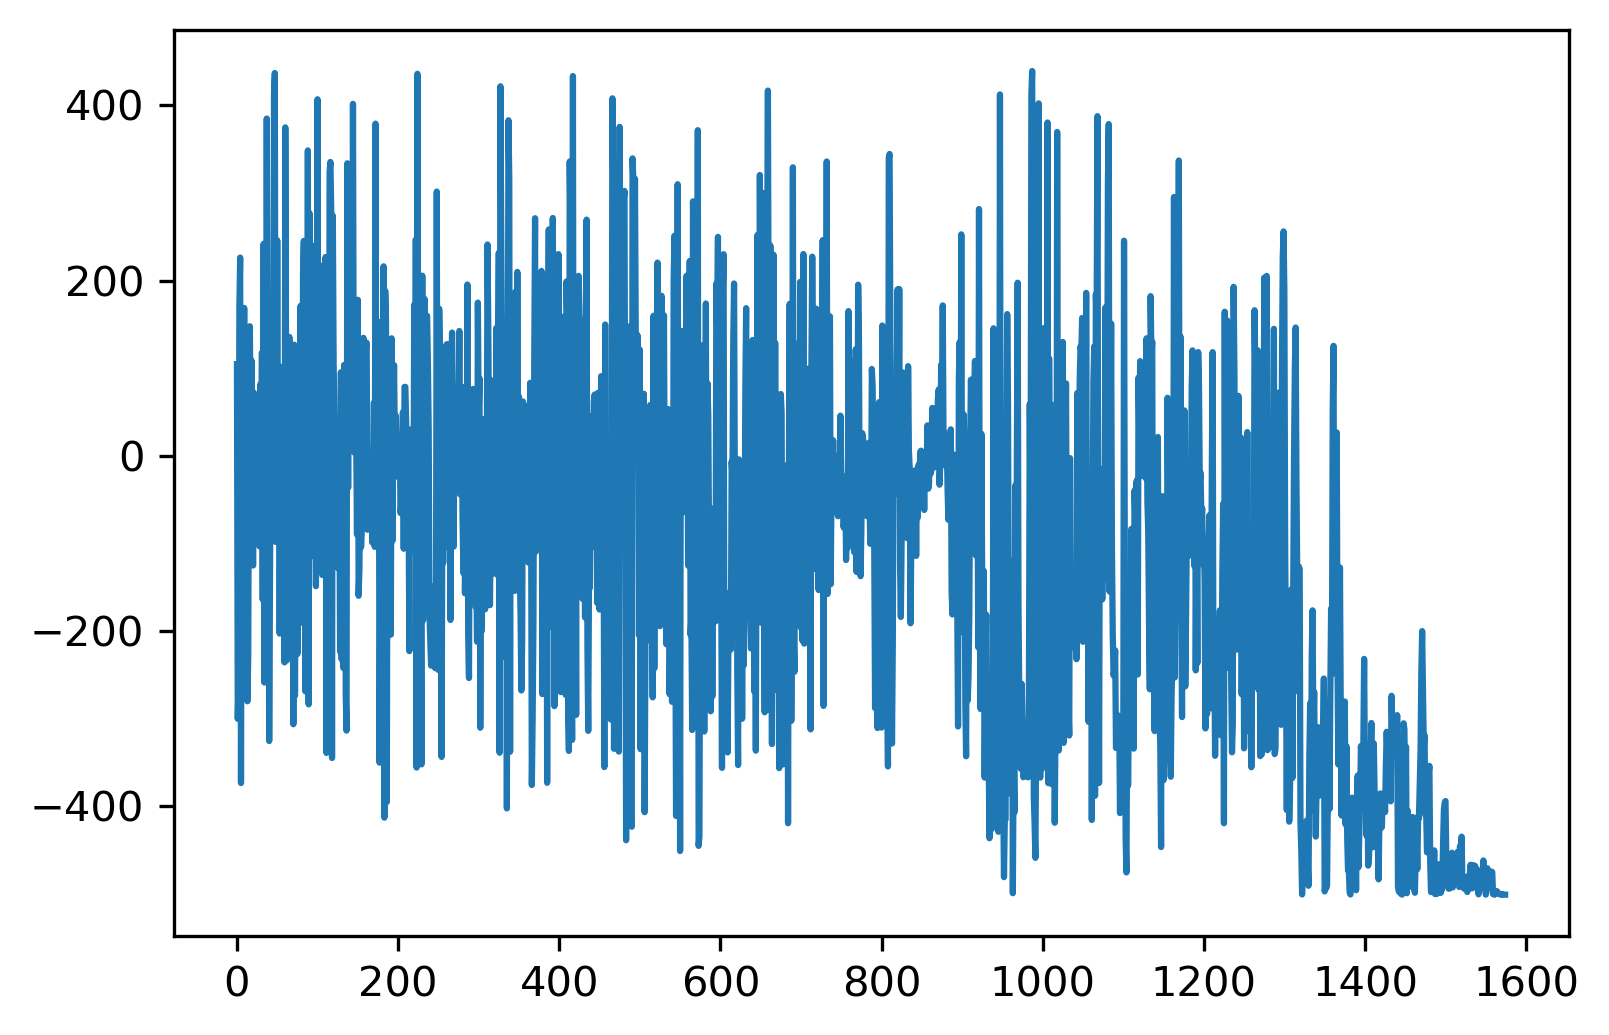

In [28]:
plt.plot(rana_2d.objective_history)

In [ ]:
%matplotlib notebook

In [ ]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(x1.flatten(), x2.flatten(), z.flatten(), cmap=mpl.cm.jet, alpha=0.3)
ax.plot(x_result[0], x_result[1], objective_result, "or")
ax.plot(archive_x[:, 0], archive_x[:, 1], archive_f, "xr")
ax.set_xlabel("variable 1")
ax.set_ylabel("variable 2")
ax.set_zlabel("cost")